In [151]:
import numpy as np
sqrt = np.sqrt

In [152]:
from matplotlib import pyplot as plt
def plot_history(x,W_history):
    plt.xlim([-1.0,1.0])
    plt.ylim([-1.0,1.0])
    plt.plot([x[:,0]],[x[:,1]], 'o',markersize=3, color='k')
    
    colors = ['g','c','r','o','b']
    for k in range(W_history.shape[1]):
        for t in range(W_history.shape[0]):
            x,y = W_history[t,k]
            alpha =.1 + .8*float(t)/W_history.shape[0]
            plt.plot([0,x], [0,y], '-',color=colors[k],alpha=alpha)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(y=0, color='gray')
    plt.axvline(x=0, color='gray')
    plt.xlim([-1.05,1.05])
    plt.ylim([-1.05,1.05])
    plt.show()

def rotate(W,theta):
    theta = np.radians(-theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    return np.dot(W,R)


# Algorithm in paper

In [153]:
def AHL_update_v1(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for j,x_j in enumerate(x_i):
            if(x_j > 0):
                for k,w in enumerate(W):
                    if(w[j] >= gamma*w_max[j]): W[k,j] += lr*x_j
            elif(x_j < 0):
                for k,w in enumerate(W):
                    if(w[j] <= gamma*w_min[j]): W[k,j] += lr*x_j
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

In [154]:
#Random samples in each quadrant
x_1st = np.random.normal([1/sqrt(2),1/sqrt(2)],scale=.05,size=(10,2))
x_2nd,x_3rd,x_4th = rotate(x_1st,90),rotate(x_1st,180),rotate(x_1st,270)

#Weights slightly off from each other
W_1st = np.array([[1/sqrt(2),1/sqrt(2)],[2/sqrt(5),1/sqrt(5)],[-1/sqrt(5),2/sqrt(5)]])
W_2nd,W_3rd,W_4th = rotate(W_1st,90),rotate(W_1st,180), rotate(W_1st,270)

#Samples slightly moved to make learn
mov = np.array([[.5,0.0]])
x_1st_,x_2nd_,x_3rd_,x_4th_ = x_1st-mov,x_2nd+mov,x_3rd+mov,x_4th-mov

#### Behavior Depends on what quadrant the least activated neuron is in.

Synaptic Competition = 3


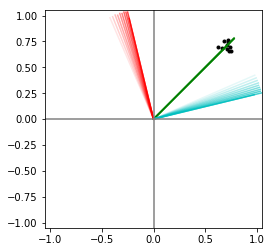

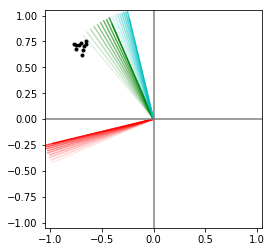

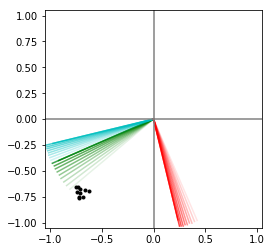

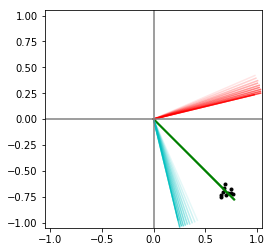

NO Synaptic Competition


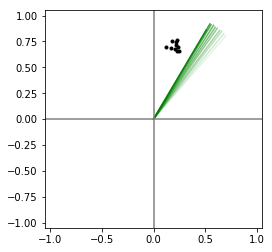

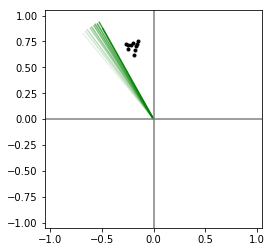

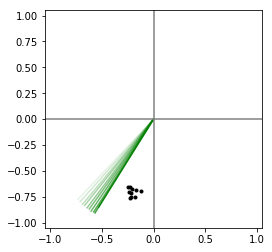

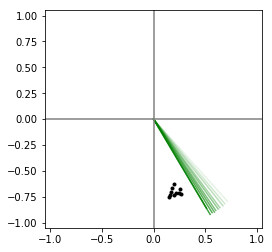

In [155]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_v1(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_v1(x,W))
    

# Algorithm in MATLAB Code

In [156]:
def AHL_update_v2(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for k,w in enumerate(W):
            mask = w >= gamma*w_max
            x_masked = x_i*mask
            y = w*x_masked
            W[k] += lr*(x_masked - y*w)
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

#### Behavior Depends on quadrant of maximium activation weight. Plus there is an added term y*w.

Synaptic Competition = 3


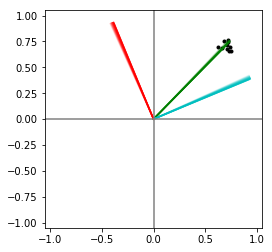

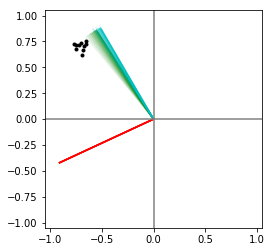

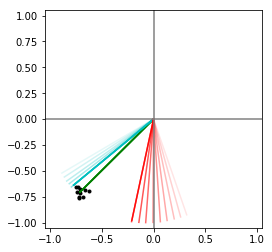

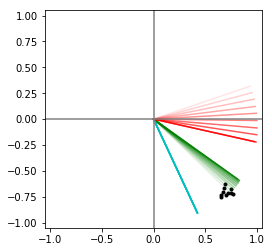

NO Synaptic Competition


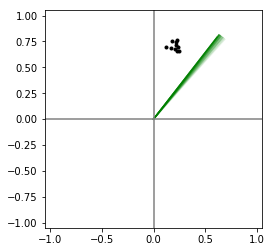

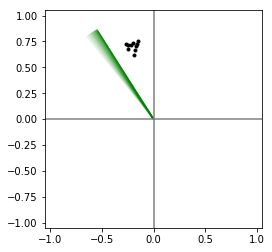

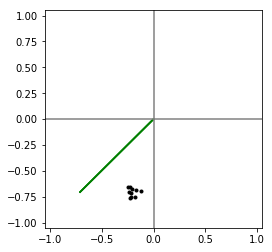

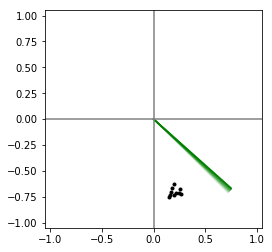

In [157]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_v2(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_v2(x,W))
  

# Other option 1: Mask on absolute value

In [170]:
def AHL_update_o1(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for k,w in enumerate(W):
            mask = np.abs(w) >= np.abs(gamma*w_max)
            x_masked = x_i*mask
            W[k] += lr*(x_masked)
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

#### Behavior is independant of quadrant but least activated neuron approaches while second diverges. Probably depends on symmetry of the setup, and is not behavior in all cases.

Synaptic Competition = 3


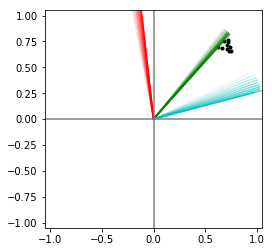

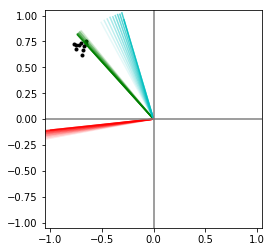

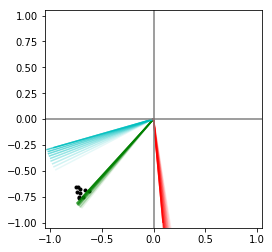

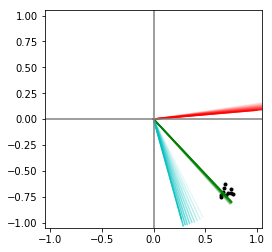

NO Synaptic Competition


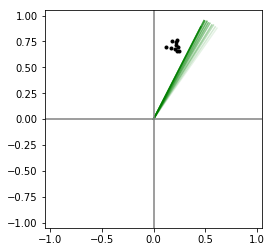

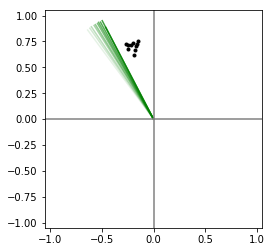

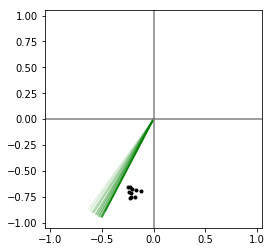

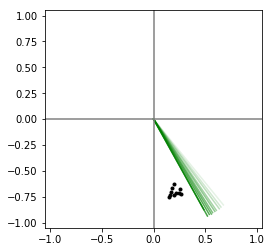

In [171]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_o1(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_o1(x,W))
  

# Other option 2: don't mask

In [160]:
def AHL_update_o2(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for k,w in enumerate(W):
            W[k] += lr*(x_i)
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

#### Every neuron converges.

Synaptic Competition = 3


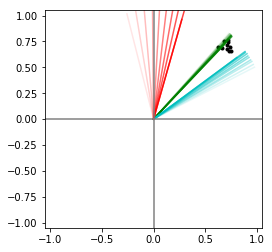

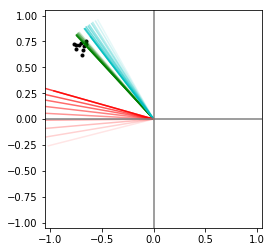

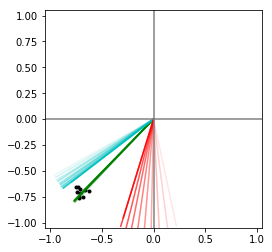

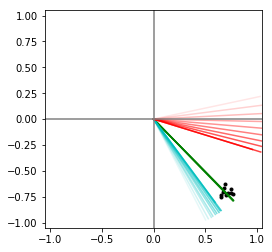

NO Synaptic Competition


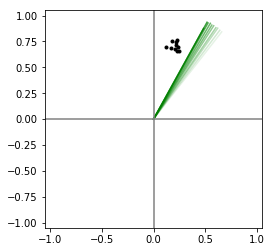

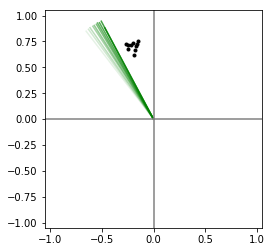

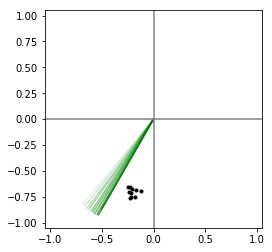

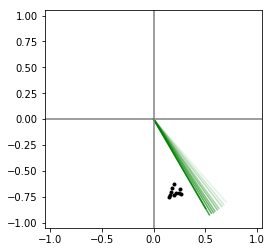

In [161]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_o2(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_o2(x,W))
  

# Other option 3: Mask on activation, but not on individual weights.

In [168]:
def AHL_update_o3(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        a_max = np.max(a)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for k,w in enumerate(W):
            if(a[k] >= gamma*a_max):
                W[k] += lr*(x_i)
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

#### Only neurons with activation similar to main neuron converge.

Synaptic Competition = 3
[ 1.68671194  1.2081452   0.70196831]
[ 1.0043231   0.96895895  0.55639469]
[ 1.00592316  0.98739607  0.53405069]
[ 1.04913562  1.01401803  0.6004544 ]
[ 0.98172792  0.98402475  0.48655713]
[ 1.01250287  0.98092319  0.59600031]
[ 0.97076179  0.96421758  0.5135797 ]
[ 1.03533501  1.01816067  0.58650783]
[ 0.95093655  0.93987474  0.53133177]
[ 0.97482355  0.97774612  0.49276907]


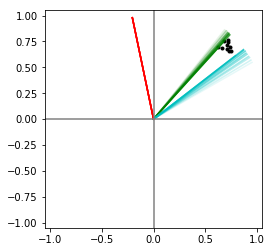

[ 1.60002728  1.24661545  0.69854723]
[ 1.00574314  0.97850507  0.55572179]
[ 1.01322308  0.99445183  0.53336274]
[ 1.04452226  1.02165287  0.59976673]
[ 0.99475709  0.98750481  0.48586631]
[ 1.00466246  0.98665114  0.59534818]
[ 0.97497622  0.96723568  0.51291911]
[ 1.0326609   1.02178033  0.5858275 ]
[ 0.9499909   0.94245171  0.53070269]
[ 0.98096808  0.97891562  0.49209376]


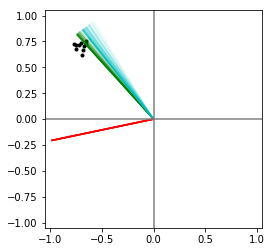

[ 1.59512522  1.24333073  0.72954385]
[ 1.00696284  0.97899514  0.58804081]
[ 1.00873205  0.99481035  0.56643053]
[ 1.05043216  1.0220474   0.63277212]
[ 0.9844189   0.98767627  0.51910821]
[ 1.01285667  0.98694925  0.62662782]
[ 0.97210787  0.96738813  0.54467116]
[ 1.0358711   1.02196734  0.6184856 ]
[ 0.95145035  0.94258428  0.56090885]
[ 0.97597359  0.97897218  0.52457696]


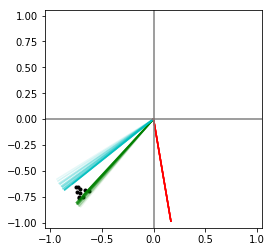

[ 1.64746676  1.20486048  0.73296494]
[ 1.01029479  0.96949091  0.58857864]
[ 1.01556312  0.98779247  0.56698127]
[ 1.04905125  1.01444132  0.63332096]
[ 0.99438426  0.98422492  0.5196625 ]
[ 1.0087443   0.98123896  0.62714762]
[ 0.97578372  0.96438797  0.54519999]
[ 1.03486537  1.01836142  0.61902877]
[ 0.95140413  0.94001815  0.56141137]
[ 0.98055566  0.97781432  0.52511838]


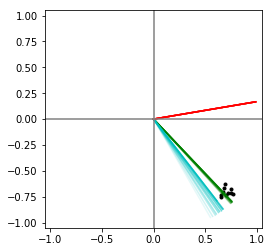

NO Synaptic Competition
[ 1.18838136]
[ 0.70207966]
[ 0.70693359]
[ 0.75677825]
[ 0.68431411]
[ 0.73111074]
[ 0.68335459]
[ 0.75676397]
[ 0.67607946]
[ 0.68682712]


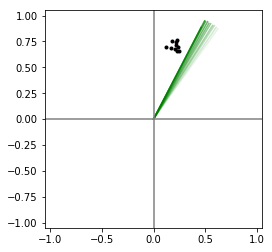

[ 1.11158061]
[ 0.69553344]
[ 0.70986503]
[ 0.74294672]
[ 0.70699989]
[ 0.70803049]
[ 0.69213024]
[ 0.74356423]
[ 0.66735482]
[ 0.71432637]


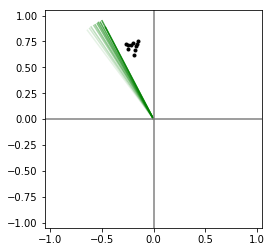

[ 1.11105181]
[ 0.69619674]
[ 0.7024003]
[ 0.75189292]
[ 0.68158758]
[ 0.72686383]
[ 0.68066528]
[ 0.75396177]
[ 0.67349507]
[ 0.68543704]


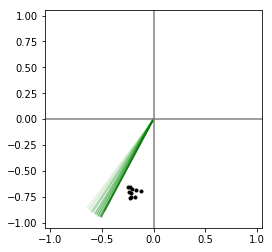

[ 1.10848342]
[ 0.68033942]
[ 0.69517515]
[ 0.73292576]
[ 0.69376416]
[ 0.70128225]
[ 0.68321995]
[ 0.73788029]
[ 0.66140572]
[ 0.70743206]


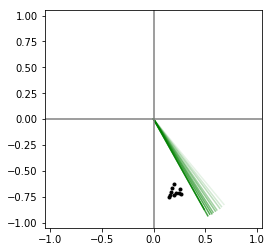

In [169]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_o3(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_o3(x,W))
  